# Where do US marathon runners live? 

Pitch: Recent attempts by Nike to 'perfect' the marathon put attention on the great feat of long-distance running. While elite marathon runners are considered some of the best athletes in the world, recreational marathon running has grown exponentially in the past decade (with well over half a million finishers in the United States last year). 

The biggest marathons in the US - Boston, Chicago and LA, bring runners from around the world to compete for prize money or just the chance to run on historic routes. For the project, I want to explore where runners with the US come from...and how far are they willing to travel to compete in some of the most well-known races. 

With this, I hope to answer questions such as: 
* What city holds the most amount of traveling runners? (as in people who don't live in the LA area travel to LA)
* What is the average distance traveled? 

Possible tite: 
* In the biggest US marathons, runners travel XXX miles to compete
* Traveling for races becomes a new part of running culture 

In [53]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import numpy

Step One: Read in slightly cleaned up CSV files of finishers (5,000 men and 5,000 women)

In [2]:
#Chicago Men
df_chicagomen = pd.read_csv('ChicagoMarathonMen.csv')
df_chicagomen.dropna(inplace=True)
df_chicagomen.head()
df_chicagomen_us = df_chicagomen.loc[df_chicagomen['Name'].str.contains("USA")]
df_chicagomen_us = df_chicagomen_us.loc[df_chicagomen_us['State'].str.contains(r'^\w\w$', na=False)]
#df_chicagomen_us.head()


In [677]:
df_chicagomentravelers = df_chicagomen_us[df_chicagomen_us['State'] == 'IL']
df_chicagomentravelers['Age'].mean()

38.584814427600627

In [692]:
df_chicagomen_int = df_chicagomen.loc[df_chicagomen['State'].str.contains(r'^\w\w\w.*', na=False)]
df_chicagomen_int = df_chicagomen_int.drop(df_chicagomen_int.index[[15]])
df_chicagomen_int.shape
#df_chicagomen_int['City'].value_counts().head(11).plot(kind='barh',title='International Men in 2016 Chicago Marathon')
#plt.savefig("International_Men_Chicago_True2.pdf") 

(2535, 6)

In [690]:
df_chicagomen_int.shape

(2535, 6)

In [3]:
#Chicago Men US finishers = 152134


In [409]:
#df_chicagomen.shape
#20,330 total male finishers 


In [668]:
#df_nycinchicago = df_chicagomen_us[df_chicagomen_us['State'] == 'NY']
#df_nycinchicago['Age'].median() 


In [669]:
#df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'CA']
#df_cainchicagomen['Age'].median()

In [670]:
#df_ininchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'IN']
#df_ininchicagomen['Age'].median()

In [671]:
#df_ilinchicago = df_chicagomen_us[df_chicagomen_us['State'] == 'IL']
#df_ilinchicago['Age'].median()

In [672]:
#df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'TX']
#df_cainchicagomen['Age'].median()

In [673]:
#df_cainchicagomen = df_chicagomen_us[df_chicagomen_us['State'] == 'MA']
#df_cainchicagomen['Age'].median()

In [674]:
#df_chicagomen_us['City'].value_counts().head(2)


Women of the Chicago Marathon

In [14]:
df_chicagowomen = pd.read_csv("ChicagoMarathonWomen.csv")
df_chicagowomen.shape

(18000, 6)

In [15]:
#18000 total female runners in the Chicago Marathon 

In [676]:
df_chicagowomen.dropna(inplace=True)
df_chicagowomen.columns = ['Name', 'City', 'State', 'Age', 'Total Time', 'Gender']
df_chicagowomen_us = df_chicagowomen.loc[df_chicagowomen['Name'].str.contains('USA')]
df_chicagowomen_us = df_chicagowomen_us[df_chicagowomen_us['State'].str.contains(r'^\w\w$', na=False)]
df_chicagowomen_travelers = df_chicagowomen_us.loc[df_chicagowomen_us['State'] == 'IL']
df_chicagowomen_travelers['Age'].mean()
#14876 women from US in the Chicago marathon 

34.702421608196211

In [693]:
df_chicagowomen_int.shape

(1221, 6)

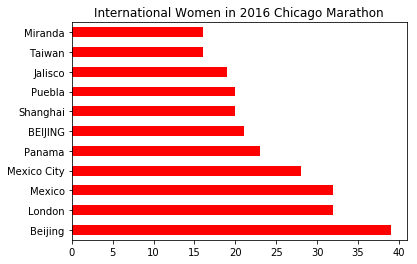

In [543]:
df_chicagowomen_int = df_chicagowomen.loc[df_chicagowomen['State'].str.contains(r'^\w\w\w.*', na=False)]
df_chicagowomen_int
df_chicagowomen_int['State'].value_counts().head(11).plot(color='red',kind='barh',title='International Women in 2016 Chicago Marathon')
plt.savefig("International_Women_Chicago_True.pdf") 


In [445]:
df_chicagowomen_int['Age'].mean()

38.531531531531535

In [454]:
df_chicagowomen_int.columns

Index(['Name', 'City', 'State', 'Age', 'Total Time', 'Gender'], dtype='object')

In [422]:
#df_chicagowomen_us['State'].value_counts().head(2)

In [423]:
#df_chicagowomen_us['City'].value_counts().head(2)


Boston Marathon

In [5]:
df_boston = pd.read_csv('BostonMarathon.csv')
df_boston.head()
df_boston.shape
#26410 total runners 

(26410, 6)

In [6]:
df_boston_us = df_boston.dropna()
df_boston_us.columns


Index(['Name', 'Country', 'City', 'State', 'M/F', 'Official Time'], dtype='object')

In [7]:
df_boston_us['M/F'].value_counts()


M    11843
F    10972
Name: M/F, dtype: int64

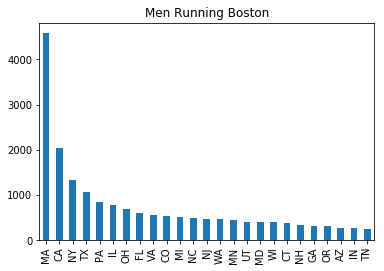

In [92]:
df_boston_men = df_boston_us[df_boston_us['M/F'] == 'M']
df_boston_men['Country'].value_counts()
df_bostonustruemen = df_boston[df_boston['Country'] == 'USA']
dfbostonmen = df_bostonustruemen['State'].value_counts().head(25).plot(kind='bar', title = 'Men Running Boston')
dfbostonmen
plt.savefig("MENTOTAL.pdf") 

In [83]:
#df_bostonustruemen['State'].value_counts()

In [604]:
df_boston_women = df_boston_us[df_boston_us['M/F'] == 'F']
df_boston_women['Country'].value_counts()
df_boston_women.columns

Index(['Name', 'Country', 'City', 'State', 'M/F', 'Official Time'], dtype='object')

In [25]:
df_bostonus_men = df_boston_men[df_boston_men['Country'] == 'USA']

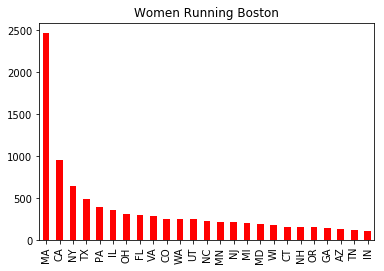

In [91]:
df_bostonwomen = df_boston_us[df_boston_us['M/F'] == 'F']
df_bostonuswomentrue = df_bostonwomen[df_bostonwomen['Country'] == 'USA']
dfbostonwomen = df_bostonuswomentrue['State'].value_counts().head(25).plot(kind='bar', title = 'Women Running Boston', color='red') 
dfbostonwomen
plt.savefig("WOMENTOTAL.pdf") 

In [90]:
fig, ax = plt.subplots()
plt.bar(
        df['dfbostonwomen'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224'
        # with label the first value in first_name
        #label=df['first_name'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar(
        df['dfbostonmen'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E'
        # with label the second value in first_name
        #label=df['first_name'][1])


# Set the y axis label
#ax.set_ylabel('Total')

# Set the chart's title
#ax.set_title('State')

# Set the position of the x ticks
#ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
#ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
#plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
#plt.grid()
#plt.show()

SyntaxError: invalid syntax (<ipython-input-90-cd5a21b6a0de>, line 15)

In [55]:
#df_bostonustruemen.groupby('State')['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', title = "Most Popular Cities for Boston Male Marathoners")

In [56]:
#df_bostonuswomentrue.groupby('State')['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color ='red', title='Most Popular Cities for Boston Female Marathoners')

LA Marathon finishers - Women 

In [57]:
#df_LAwomen = pd.read_csv('LAMarathonWomen.csv')
#df_LAwomen.head()
#df_LAwomen.shape

In [58]:
#df_LAwomen_int.shape

In [59]:
#df_LAwomen_int = df_LAwomen.loc[df_LAwomen['State'].str.contains(r'^\w\w\w.*', na=False)]
#df_LAwomen_int['State'].value_counts(ascending=False).head(10).plot(kind='barh', title='International Women in LA Marathon', color='red')
#plt.savefig("International_Women_LA_True.pdf") 

In [60]:
#df_LAwomen_int['Age'].mean()

In [62]:
#df_LAwomen_us = df_LAwomen.loc[df_LAwomen['State'].str.contains(r'^\w\w$', na=False)]
#df_LAwomen_us['State'].value_counts()
#LAwomentravelers = df_LAwomen_us[df_LAwomen_us['State'] != 'CA']
#LAwomentravelers['State'].value_counts()#.plot(kind='bar',figsize=(40,20), color='red')


LA Marathon Men

In [64]:
##df_la_men = pd.read_csv('LAMarathonMen.csv')
#df_la_men.dtypes
#df_la_men['State'].astype(str)
#df_la_men.head(2)

In [65]:
##df_la_men_new = df_la_men.loc[df_la_men['State'].str.contains(r'^\w\w$', na=False)]
#df_la_men_new = df_la_men_new[df_la_men_new['State'] != "CA"]
#df_la_men_new['State'].value_counts().plot(kind='bar',figsize=(40,20), color='blue')
#df_la_men_new['State'].value_counts()

In [67]:
#f_LAmen_int = df_la_men.loc[df_la_men['State'].str.contains(r'^\w\w\w.*', na=False)]
#df_LAmen_int['State'].value_counts().head(10).plot(kind='barh', title='International Men in the LA Marathon', color='blue')
#plt.savefig("International_Men_LA_True.pdf")
#df_LAmen_int.shape

In [68]:
#Japan_LA_Men = df_LAmen_int[df_LAmen_int['State'] == 'JAPAN']
#Japan_LA_Men['Age'].mean()


In [69]:
#Japan_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'JAPAN']
#Japan_LA_Women['Age'].mean()

In [70]:
#Mexico_LA_Men = df_LAmen_int[df_LAmen_int['State'] == 'MEXICO']
#Mexico_LA_Men['Age'].mean()

In [71]:
##Mexico_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'MEXICO']
#M@exico_LA_Women['Age'].mean()

In [72]:
#Germany_LA_Women = df_LAwomen_int[df_LAwomen_int['State'] == 'GERMANY']
#Germany_LA_Women['Age'].mean()

In [73]:
#Germany_LA_men = df_LAmen_int[df_LAmen_int['State'] == 'GERMANY']
#Germany_LA_men['Age'].mean()

In [74]:
#df_LAmen_int['Age'].mean()

Reading in finishers 

In [75]:
##df1 = pd.read_csv('finishers_by_state/finishers_by_state - boston_men (1).csv')
#df1.head()

In [76]:
#df2 = pd.read_csv('finishers_by_state/finishers_by_state - boston_women (1).csv')
#df2.head()

In [77]:
#boston = df1.merge(df2, on='State', how='outer')
#boston.head()

In [78]:
#df3 = pd.read_csv('finishers_by_state/finishers_by_state - chicago_men (2).csv')

In [190]:
#@df4 = pd.read_csv('finishers_by_state/finishers_by_state - chicago_women (1).csv')

In [609]:

#chicago = df4.merge(df3, on = 'State', how='outer')
#chicago.head()
#chicago['chicago_women'].sum()

In [610]:
#df5 = pd.read_csv('finishers_by_state/finishers_by_state - la_men (1).csv')

In [611]:
#df6 = pd.read_csv('finishers_by_state/finishers_by_state - la_women (1).csv')

In [80]:
#la = df5.merge(df6, on='State', how='outer')
#new_df = la.merge(boston, on='State')
#new_df.plot(x="State", kind="bar")

In [81]:
#total_finishers = new_df.merge(chicago, on='State', how='outer')


In [82]:
#This will be my introductory map to the project 
#total_finishers.fillna("0", inplace=True)
#all_finishers = total_finishers[total_finishers['State'] != 'PR']
#all_finishers = all_finishers.reset_index()
#all_finishers

In [197]:
for column in all_finishers.columns[1:]:
    all_finishers[column] = all_finishers[column].astype(int)
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [198]:
#all_finishers['Total'] = all_finishers['la_men'] + all_finishers['la_women'] + all_finishers['boston_men'] + all_finishers['boston_women'] + all_finishers['chicago_women'] + all_finishers['Chicago_Men']
#all_finishers['Total'] = all_finishers.sum(axis=1)
for column in all_finishers.columns:
    print(column,)
    print(all_finishers[column].apply(lambda x: type(x)).unique())

State
[<class 'str'>]
la_men
[<class 'int'>]
la_women
[<class 'int'>]
boston_men
[<class 'int'>]
boston_women
[<class 'int'>]
chicago_women
[<class 'int'>]
Chicago_Men
[<class 'int'>]


In [335]:
all_finishers['Total'] = all_finishers['la_men'] + all_finishers['la_women'] + all_finishers['boston_men'] + all_finishers['boston_women'] + all_finishers['chicago_women'] + all_finishers['Chicago_Men']
all_finishers['Total_Women'] = all_finishers['la_women'] + all_finishers['boston_women'] + all_finishers['chicago_women'] 
all_finishers['Total_Men'] = all_finishers['la_men'] + all_finishers['boston_men'] + all_finishers['Chicago_Men'] 
all_finishers['Total_LA'] = all_finishers['la_men'] + all_finishers['la_women']
all_finishers['Total_CHI'] = all_finishers['Chicago_Men'] + all_finishers['chicago_women']
all_finishers['Total_BOS'] = all_finishers['boston_women'] + all_finishers['boston_men']

all_finishers

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men,Total_LA,Total_CHI,Total_BOS
0,AK,5,1,31,21,20,10,88,42,46,6,30,52
1,AL,2,2,44,36,63,42,189,101,88,4,105,80
2,AR,3,4,30,26,38,38,139,68,71,7,76,56
3,AZ,46,28,143,127,69,75,488,224,264,74,144,270
4,CA,8846,6426,1097,952,709,658,18688,8087,10601,15272,1367,2049
5,CO,34,45,282,252,255,185,1053,552,501,79,440,534
6,CT,9,7,217,160,95,86,574,262,312,16,181,377
7,DC,17,7,80,76,117,96,393,200,193,24,213,156
8,DE,1,2,26,21,11,4,65,34,31,3,15,47
9,FL,39,20,315,294,458,372,1498,772,726,59,830,609


In [582]:
all_finishers

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men,Total_LA,Total_CHI,Total_BOS
0,AK,5,1,31,21,20,10,88,42,46,6,30,52
1,AL,2,2,44,36,63,42,189,101,88,4,105,80
2,AR,3,4,30,26,38,38,139,68,71,7,76,56
3,AZ,46,28,143,127,69,75,488,224,264,74,144,270
4,CA,8846,6426,1097,952,709,658,18688,8087,10601,15272,1367,2049
5,CO,34,45,282,252,255,185,1053,552,501,79,440,534
6,CT,9,7,217,160,95,86,574,262,312,16,181,377
7,DC,17,7,80,76,117,96,393,200,193,24,213,156
8,DE,1,2,26,21,11,4,65,34,31,3,15,47
9,FL,39,20,315,294,458,372,1498,772,726,59,830,609


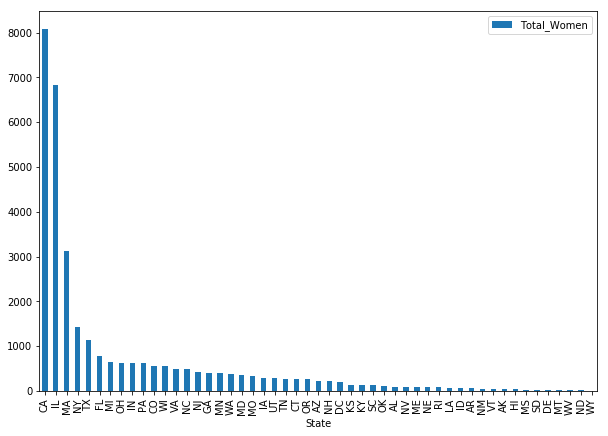

In [209]:
all_finishers.sort_values(by='Total_Women', ascending=False).plot(x='State', y='Total_Women',kind='bar',figsize=(10,7))

In [229]:
#df_map= df_map.to_crs({'init': 'epsg:4326'})

In [230]:
#ax = df_map.plot(color='grey', figsize=(30,30))
#all_finishers.plot(ax=ax)
#ax.axis('off')

In [212]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [327]:
all_finishers

,State,la_men,la_women,boston_men,boston_women,chicago_women,Chicago_Men,Total,Total_Women,Total_Men
0,AK,5,1,31,21,20,10,88,42,46
1,AL,2,2,44,36,63,42,189,101,88
2,AR,3,4,30,26,38,38,139,68,71
3,AZ,46,28,143,127,69,75,488,224,264
4,CA,8846,6426,1097,952,709,658,18688,8087,10601
5,CO,34,45,282,252,255,185,1053,552,501
6,CT,9,7,217,160,95,86,574,262,312
7,DC,17,7,80,76,117,96,393,200,193
8,DE,1,2,26,21,11,4,65,34,31
9,FL,39,20,315,294,458,372,1498,772,726


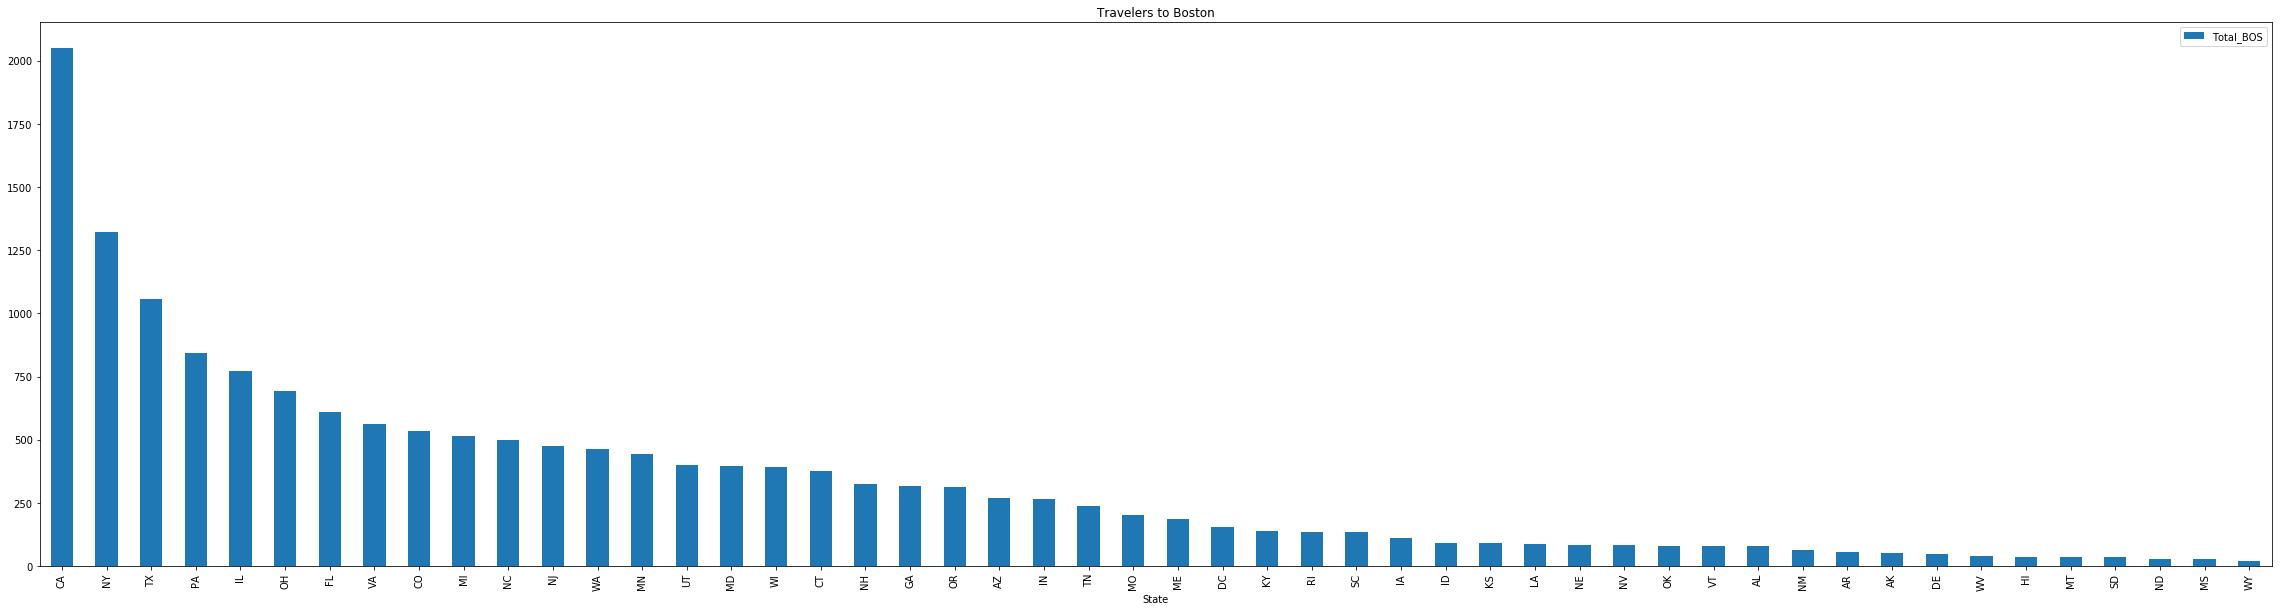

In [350]:
look_at_finishers = all_finishers[['State', 'Total_BOS']]
look_at_finishers = look_at_finishers[look_at_finishers['State'] != 'MA']
look_at_finishers.sort_values(by='Total_BOS',ascending=False).plot(by='State', kind='bar', x='State', figsize=(40,10), title='Travelers to Boston')
plt.savefig("Boston_Finishers_By_State.pdf") 

In [646]:
#all_travelers = all_finishers[['State','Total_Women','Total_Men']]
#all_travelers = all_travelers[all_travelers.State != 'CA']
#all_travelers = all_travelers[all_travelers.State != 'MA']
#all_travelers = all_travelers[all_travelers.State != 'IL']
#all_travelers.sort_values(by='Total_Women',ascending=False).plot(x='State', kind='bar', legend=True, title="Total",figsize=(30,20))
#plt.savefig("Out_Of_Staters.pdf") 

In [645]:
#df_chicagowomen_travel = df_chicagowomen_us[df_chicagowomen_us['State'] != 'IL']
#df_chicagowomen_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Women in Chicago', color='red', figsize=(20,6))

In [644]:
df_chicago_men_travel = df_chicagomen_us[df_chicagomen_us['State'] != "IL"] 
#df_chicago_men_travel.shape
#ax = df_chicago_men_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Men in Chicago', figsize=(20,6), legend=True)
#df_chicagowomen_travel['State'].value_counts().head(25).plot(kind='bar', title='Traveling Women in Chicago', color='red', legend=True)

In [569]:
#runners per capita

In [45]:
percapita= pd.read_csv('per_capita_runners_true - Sheet1.csv')
percapita

,State,population,men,women,total_runners,/thousandstatepop
0,CA,39255000,2049,952,3001,7.644886
1,NY,8538000,1324,641,1965,23.014758
2,TX,2768000,1055,493,1548,55.924855
3,PA,12780000,842,390,1232,9.640063
4,IL,12800000,771,353,1124,8.781250
5,OH,11610000,693,311,1004,8.647717
6,FL,20610000,609,294,903,4.381368
7,VA,8412000,564,281,845,10.045174
8,CO,5541000,534,252,786,14.185165
9,WA,7288000,465,247,712,9.769484


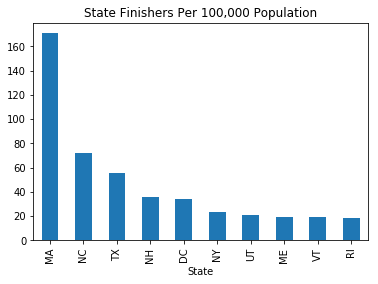

In [54]:
percapita.sort_values(by="/thousandstatepop", ascending=False).head(10).plot(x='State', y='/thousandstatepop', kind='bar', title="State Finishers Per 100,000 Population", legend=False)
plt.savefig("THIS_IS_THE_PER_CAPITA_IMAGE.pdf") 

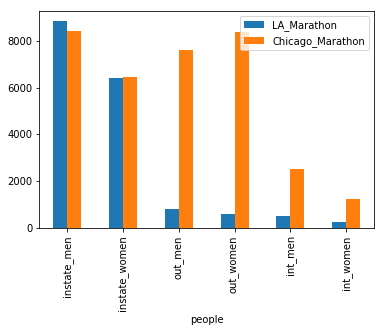

In [698]:
by_types = pd.read_csv('Untitled spreadsheet - Sheet1.csv')
by_types.plot(x='people', kind='bar')
plt.savefig("Compare.pdf")